In [1]:
from hnl_flux import *
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm, ticker
from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

petite_res_dune_rates = np.genfromtxt("../DUNE-BKG/resonance_kk_repro/petite_resonance_dune_Nv_vs_mV.txt")
petite_brem_dune_rates = np.genfromtxt("../DUNE-BKG/resonance_kk_repro/petite_brem_dune_Nv_vs_mV.txt")
petite_comp_dune_rates = np.genfromtxt("../DUNE-BKG/resonance_kk_repro/petite_compton_dune_Nv_vs_mV.txt")


mass_list = np.logspace(1, 4, 250)

pbrem_flux_list = []
res_vec_flux_list = []
brem_v_flux_list = []

brem_flux_epem = FluxHNLFromElectronPositron(zprime_mass=mass_list[0], coupling_BL=1.0, n_samples=1000000, max_track_length=10.0)
res_flux_epem = FluxHNLFromElectronPositron(zprime_mass=mass_list[0], coupling_BL=1.0, n_samples=500000, max_track_length=5.0)
brem_flux_proton = FluxHNLFromProtonBrem(zprime_mass=mass_list[0], coupling_BL=1.0, n_samples=200000)

for ma in mass_list:
    
    # vector fluxes
    brem_flux_epem.set_new_params(zprime_mass=ma)
    res_flux_epem.set_new_params(zprime_mass=ma)
    brem_flux_proton.set_new_params(zprime_mass=ma)

    #resonant_flux.simulate()
    brem_flux_epem.simulate(simulate_res=False)
    res_flux_epem.simulate(simulate_brem=False)

    brem_flux_proton.simulate()

    brem_v_flux_list.append(1.47e22 * np.sum(brem_flux_epem.axion_flux))
    res_vec_flux_list.append(1.47e22 * np.sum(res_flux_epem.axion_flux))
    pbrem_flux_list.append(1.47e22 * np.sum(brem_flux_proton.axion_flux))
    





/home/thompson/Dropbox/coding/pyALPs/HNL/hnl_flux.py:394: RuntimeWarning: invalid value encountered in arcsin
  theta = arcsin(sinTheta)
/home/thompson/Dropbox/coding/pyALPs/HNL/hnl_flux.py:391: RuntimeWarning: invalid value encountered in sqrt
  zp_p = sqrt(zp_energy**2 - self.ma**2)


In [19]:
np.sqrt(DUNE_AREA)/DUNE_DIST

0.007983581350097283

In [2]:
pi0_flux_per_1e5POT = np.genfromtxt("data/dune_target_pi0_4vectors_1e5POT.txt")
eta_flux_per_1e5POT = np.genfromtxt("data/dune_target_eta0_4vectors_1e5POT.txt")


print(pi0_flux_per_1e5POT.shape[0])

# trim to 20 mrad
pi0_theta = np.arccos(pi0_flux_per_1e5POT[:,2] / np.sqrt(pi0_flux_per_1e5POT[:,0]**2 + pi0_flux_per_1e5POT[:,1]**2 + pi0_flux_per_1e5POT[:,2]**2))
eta_theta = np.arccos(eta_flux_per_1e5POT[:,2] / np.sqrt(eta_flux_per_1e5POT[:,0]**2 + eta_flux_per_1e5POT[:,1]**2 + eta_flux_per_1e5POT[:,2]**2))

pi0_flux_per_1e5POT = pi0_flux_per_1e5POT[pi0_theta < 1e-2]
eta_flux_per_1e5POT = eta_flux_per_1e5POT[eta_theta < 1e-2]

# add the mass energy back in
pi0_p2 = pi0_flux_per_1e5POT[:,0]**2 + pi0_flux_per_1e5POT[:,1]**2 + pi0_flux_per_1e5POT[:,2]**2
pi0_T2 = pi0_flux_per_1e5POT[:,3]**2
pi0_mass = (pi0_p2 - pi0_T2)/(2*pi0_flux_per_1e5POT[:,3])
pi0_flux_per_1e5POT[:,3] += pi0_mass

eta_p2 = eta_flux_per_1e5POT[:,0]**2 + eta_flux_per_1e5POT[:,1]**2 + eta_flux_per_1e5POT[:,2]**2
eta_T2 = eta_flux_per_1e5POT[:,3]**2
eta_mass = (eta_p2 - eta_T2)/(2*eta_flux_per_1e5POT[:,3])
eta_flux_per_1e5POT[:,3] += eta_mass

print(pi0_flux_per_1e5POT.shape[0])

1196457
16760


In [3]:
flux_pion = FluxHNLFromNeutralMeson(meson_flux=pi0_flux_per_1e5POT, flux_weight=1e-5, coupling_BL=1.0,
                                    zprime_mass=mass_list[0], mixing_flavor=0, n_samples=1, apply_angle_cut=True,
                                    meson_species="Pion")
flux_eta = FluxHNLFromNeutralMeson(meson_flux=eta_flux_per_1e5POT, flux_weight=1e-5, coupling_BL=1.0,
                                    zprime_mass=mass_list[0], mixing_flavor=0, n_samples=1, apply_angle_cut=True,
                                    meson_species="Eta")

flux_eta.mass_meson = M_ETA
pion_flux_list = []
eta_flux_list = []
for ma in mass_list:
    if ma > max(mass_list)*0.1 and ma < 0.5*max(mass_list):
        print("10 percent done...")
    if ma > max(mass_list)*0.5:
        print(" 50 percent done...")
    # vector fluxes
    flux_pion.set_new_params(zprime_mass=ma)
    flux_eta.set_new_params(zprime_mass=ma)

    #resonant_flux.simulate()
    flux_pion.simulate()
    flux_eta.simulate()

    pion_flux_list.append(1.47e22 * np.sum(flux_pion.axion_flux))
    eta_flux_list.append(1.47e22 * np.sum(flux_eta.axion_flux))

pion_flux_list = np.array(pion_flux_list)
eta_flux_list = np.array(eta_flux_list)

10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent done...
10 percent d

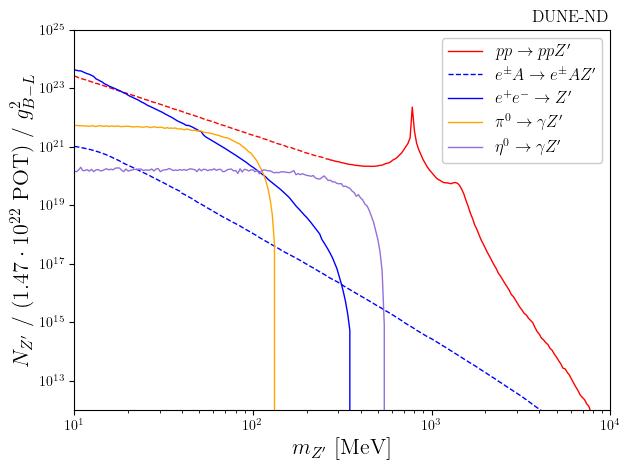

In [5]:
# PLOT OUR RATES

from scipy.signal import savgol_filter

brem_smoothed = savgol_filter(50*np.array(brem_v_flux_list), 30, 1, mode='nearest')
res_smoothed = savgol_filter(res_vec_flux_list, 7, 1, mode='nearest')

plt.plot(mass_list[mass_list < 250.0], np.array(pbrem_flux_list)[mass_list < 250.0], color='r', ls='dashed', linewidth=1.0)
plt.plot(mass_list[mass_list >= 250.0], np.array(pbrem_flux_list)[mass_list >= 250.0], label=r"$p p \to p p Z^\prime$", color='r', linewidth=1.0)
plt.plot(mass_list, brem_smoothed, label=r"$e^\pm A \to e^\pm A Z^\prime$", color="b", ls='dashed', linewidth=1.0)
plt.plot(mass_list, res_smoothed, label=r"$e^+ e^- \to Z^\prime$", color="b", linewidth=1.0)
plt.plot(mass_list, pion_flux_list, label=r"$\pi^0 \to \gamma Z^\prime$", color="orange", linewidth=1.0)
plt.plot(mass_list, eta_flux_list, label=r"$\eta^0 \to \gamma Z^\prime$", color="mediumpurple", linewidth=1.0)

#plt.plot(petite_res_dune_rates[:,0], power(0.3,-2)*1.47e22 * petite_res_dune_rates[:,1],
#         label=r"PETITE $e^+ e^- \to Z^\prime$", color='g', linewidth=1.0)
#plt.plot(petite_brem_dune_rates[:,0], power(0.3,-2)*1.47e22 * petite_brem_dune_rates[:,1],
#         label=r"PETITE $e^\pm A \to e^\pm A Z^\prime$",
#         ls='dashed', linewidth=1.0, color="g")
#plt.plot(petite_comp_dune_rates[:,0], power(0.3,2)*1.47e22 * petite_comp_dune_rates[:,1], label="PETITE Compton brem", ls='dotted', color='g')

plt.ylabel(r"$N_{Z^\prime}$ / ($1.47 \cdot 10^{22}$ POT) / $g^2_{B-L}$", fontsize=16)
plt.xlabel(r"$m_{Z^\prime}$ [MeV]", fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.ylim((1e12, 1e25))
plt.xlim((10,1e4))
plt.title(r"DUNE-ND", loc="right", fontsize=12)
plt.legend(fontsize=12, framealpha=1.0)
plt.tight_layout()
plt.savefig("plots/Zprime_flux_by_channel.pdf")
plt.show()


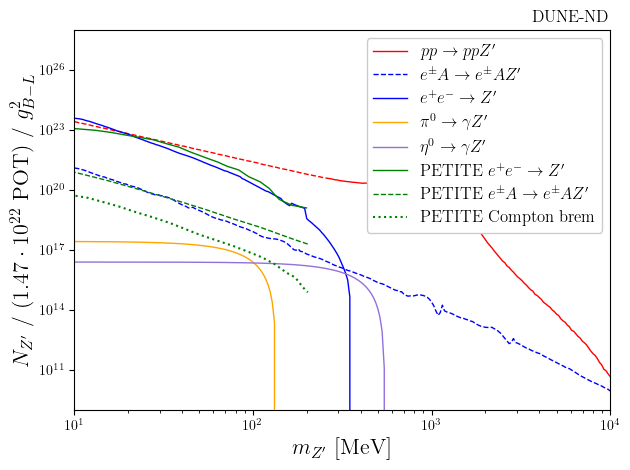

In [5]:
# PLOT OUR RATES

from scipy.signal import savgol_filter

brem_smoothed = savgol_filter(50*np.array(brem_v_flux_list), 20, 4, mode='nearest')
res_smoothed = savgol_filter(res_vec_flux_list, 7, 1, mode='nearest')

plt.plot(mass_list[mass_list < 250.0], np.array(pbrem_flux_list)[mass_list < 250.0], color='r', ls='dashed', linewidth=1.0)
plt.plot(mass_list[mass_list >= 250.0], np.array(pbrem_flux_list)[mass_list >= 250.0], label=r"$p p \to p p Z^\prime$", color='r', linewidth=1.0)
plt.plot(mass_list, brem_smoothed, label=r"$e^\pm A \to e^\pm A Z^\prime$", color="b", ls='dashed', linewidth=1.0)
plt.plot(mass_list, res_smoothed, label=r"$e^+ e^- \to Z^\prime$", color="b", linewidth=1.0)
plt.plot(mass_list, pion_flux_list, label=r"$\pi^0 \to \gamma Z^\prime$", color="orange", linewidth=1.0)
plt.plot(mass_list, eta_flux_list, label=r"$\eta^0 \to \gamma Z^\prime$", color="mediumpurple", linewidth=1.0)

plt.plot(petite_res_dune_rates[:,0], power(0.3,-2)*1.47e22 * petite_res_dune_rates[:,1],
        label=r"PETITE $e^+ e^- \to Z^\prime$", color='g', linewidth=1.0)
plt.plot(petite_brem_dune_rates[:,0], power(0.3,-2)*1.47e22 * petite_brem_dune_rates[:,1],
        label=r"PETITE $e^\pm A \to e^\pm A Z^\prime$",
        ls='dashed', linewidth=1.0, color="g")
plt.plot(petite_comp_dune_rates[:,0], power(0.3,2)*1.47e22 * petite_comp_dune_rates[:,1], label="PETITE Compton brem", ls='dotted', color='g')

plt.ylabel(r"$N_{Z^\prime}$ / ($1.47 \cdot 10^{22}$ POT) / $g^2_{B-L}$", fontsize=16)
plt.xlabel(r"$m_{Z^\prime}$ [MeV]", fontsize=16)
plt.yscale('log')
plt.xscale('log')
plt.ylim((1e9, 1e28))
plt.xlim((10,1e4))
plt.title(r"DUNE-ND", loc="right", fontsize=12)
plt.legend(fontsize=12, framealpha=1.0)
plt.tight_layout()
plt.savefig("plots/Zprime_flux_by_channel.pdf")
plt.show()
